# Assignment Sheet 11
## Done by Nayan Man Singh Pradhan

Load necessary modules

In [9]:
%matplotlib notebook
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import pairwise
import scipy.linalg as linalg

Generate training data

In [10]:
N=31

X_train = np.zeros((N*N,2))
X_1, X_2 = np.meshgrid(np.linspace(-4,4,N),np.linspace(-4,4,N))
X_train[:,0] = X_1.flatten()
X_train[:,1] = X_2.flatten()
y_train = np.zeros(N*N)
y_train = y_train.reshape(-1,1)

def f(x, y):
     return (np.sin(np.sqrt((0.5*x) ** 2 + (0.5*y) ** (4))))

y_train =  f(X_train[:,0],X_train[:,1])
y_train = y_train.reshape(-1,1)

In [11]:
# X_train = [[-2],[0],[1]]
# y_train = [[2],[0],[2]]
# X_train = np.array(X_train)

def L2_loss(x1, x2):
    temp = (x1-x2)
    return np.dot(temp.T, temp)

def kernel(x1, x2, sigma):
    loss = L2_loss(x1, x2)
    return np.exp(-(loss/(sigma**2)))

def Cholesky_solver(M, b):
    c, low = linalg.cho_factor(M)
    return (linalg.cho_solve((c, low), b))

def Kernel_Ridge_Regression_fit(X_train, y_train, sigma, gamma):
    A = []
    for x1 in X_train:
        temp = []
        for x2 in X_train:
            k = kernel(x1, x2, sigma)
            temp.append(k)
        A.append(temp)
    A = np.array(A)
    M = A + (gamma * np.identity(A.shape[1]))
    alpha = Cholesky_solver(M, y_train)
    return alpha

def Kernel_Ridge_Regression_predict(X_train, y_train, sigma, gamma, X_Eval, fit_alpha):
    Eval_Kernel = []
    for x in X_train:
        k = kernel(X_Eval, x, sigma)
        Eval_Kernel.append(k)
    Eval_Kernel = np.array(Eval_Kernel)
    Y_hat = np.dot(fit_alpha.T, Eval_Kernel)
    return Y_hat

Train kernel-based model (without regularization)

In [12]:
phi_X_train = pairwise.rbf_kernel(X_train, X_train,gamma=0.15)
print('# of inputs/features: ', phi_X_train.shape[1])

lin = LinearRegression()
lin.fit(phi_X_train, y_train)

# of inputs/features:  961


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Evaluate model also outside of training data

In [13]:
N_eval = 150
x_1 = np.linspace(-4.2,4.2,N_eval)
x_2 = np.linspace(-4.2,4.2,N_eval)
X_1, X_2 = np.meshgrid(x_1,x_2)
X_eval = np.zeros((N_eval**2,2))
X_eval[:,0] = X_1.flatten()
X_eval[:,1] = X_2.flatten()
phi_X_eval = pairwise.rbf_kernel(X_eval, X_train,gamma=0.15)

Y_eval = lin.predict(phi_X_eval)

Plot training data and model

<IPython.core.display.Javascript object>


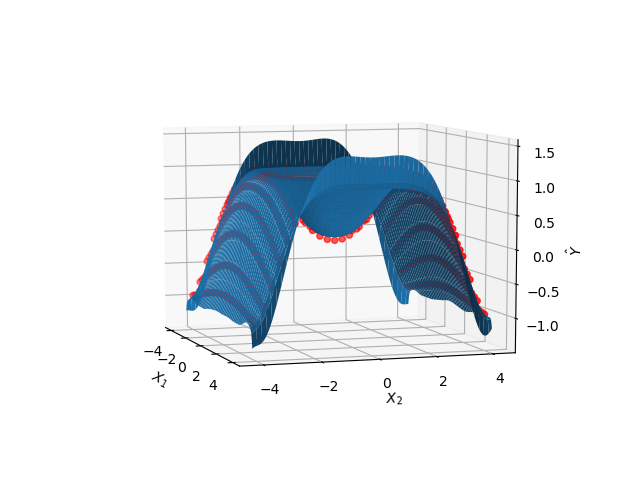

In [14]:
pos = np.empty(X_1.shape + (2,))
pos[:, :, 0] = X_1; pos[:, :, 1] = X_2
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X_train[:,0], X_train[:,1],y_train[:],c='red', label="training set")
ax.plot_surface(X_1,X_2,Y_eval.reshape(N_eval,N_eval), label="regression predictor")
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel("$\hat{Y}$")
ax.view_init(elev=8., azim=-18)
plt.show()

Train kernel-based model with ridge regression

In [15]:
phi_X_train = pairwise.rbf_kernel(X_train, X_train,gamma=0.15)
print('# of inputs/features: ', phi_X_train.shape[1])

ridge_value = 0.001

lin = Ridge(ridge_value)
lin.fit(phi_X_train, y_train)

# Fit for self-implemented function
KRR_FIT = Kernel_Ridge_Regression_fit(X_train, y_train, sigma=1, gamma=ridge_value)

# of inputs/features:  961


Evaluate model also outside of training data

In [ ]:
N_eval = 150
x_1 = np.linspace(-4.2,4.2,N_eval)
x_2 = np.linspace(-4.2,4.2,N_eval)
X_1, X_2 = np.meshgrid(x_1,x_2)
X_eval = np.zeros((N_eval**2,2))
X_eval[:,0] = X_1.flatten()
X_eval[:,1] = X_2.flatten()
phi_X_eval = pairwise.rbf_kernel(X_eval, X_train,gamma=0.15)

Y_eval = lin.predict(phi_X_eval)

# Predict for self evaluated function
Y_Self = []
for X_Eval_i in X_eval:
    i_y = Kernel_Ridge_Regression_predict(X_train, y_train, sigma=1, gamma=ridge_value, X_Eval=X_Eval_i, fit_alpha=KRR_FIT)   
    Y_Self.append(i_y)
Y_Self = np.array(Y_Self)

Plot training data and model

In [ ]:
pos = np.empty(X_1.shape + (2,))
pos[:, :, 0] = X_1; pos[:, :, 1] = X_2
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X_train[:,0], X_train[:,1],y_train[:],c='red', label="training set")
# For self implementation
ax.plot_surface(X_1,X_2,Y_Self.reshape(N_eval,N_eval), label="regression predictor")
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel("$\hat{Y}$")
ax.view_init(elev=8., azim=-18)
plt.title("Result for Self-Implemented Kernel Ridge Regression")
plt.show()

In [ ]:
pos = np.empty(X_1.shape + (2,))
pos[:, :, 0] = X_1; pos[:, :, 1] = X_2
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X_train[:,0], X_train[:,1],y_train[:],c='red', label="training set")
# For Library Implementation
ax.plot_surface(X_1,X_2,Y_eval.reshape(N_eval,N_eval), label="regression predictor")
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel("$\hat{Y}$")
ax.view_init(elev=8., azim=-18)
plt.title("Reference Result for Library Kernel Ridge Regression")
plt.show()